--- Descripción del dataset: Diabetes ---

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

Tamaño del dataset: (768, 9)

Primeras filas del dataset:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             7

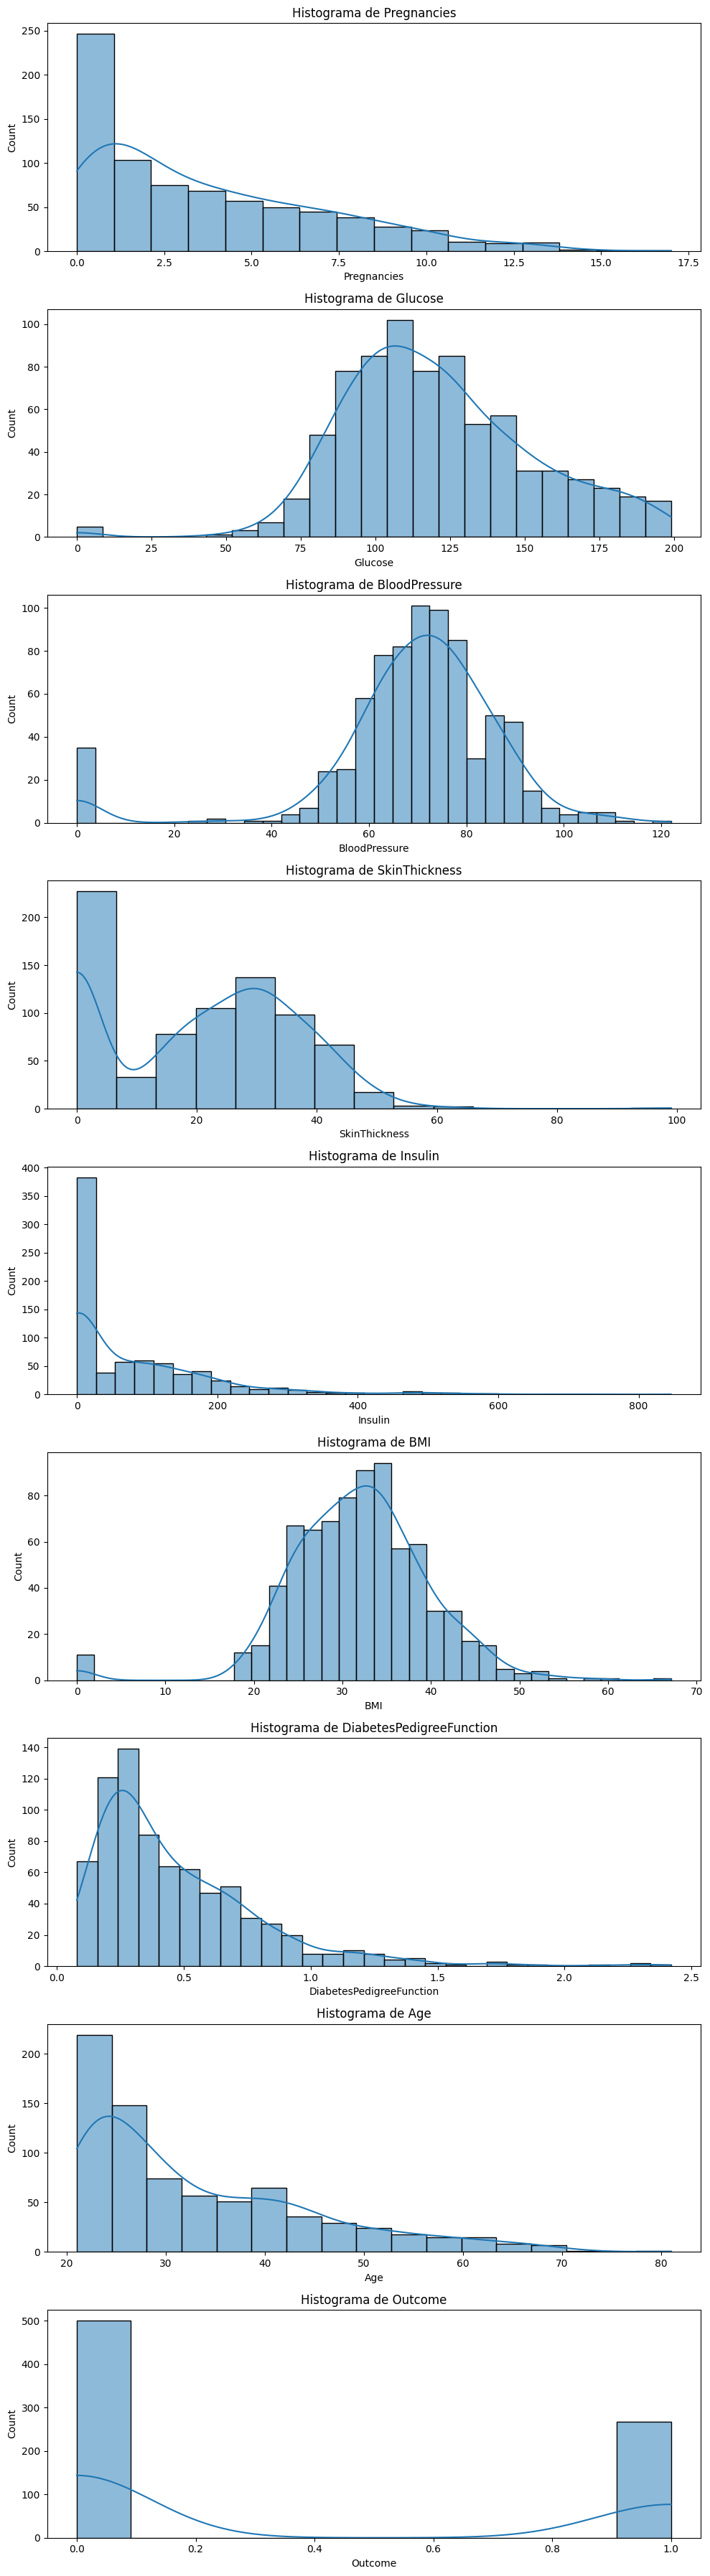

In [17]:
# Utilizare funciones para agilizar el EDA inicial de los 4 datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para cargar y describir el conjunto de datos
def describe_dataset(df, name):
    print(f"--- Descripción del dataset: {name} ---\n")

    # Definir columnas numéricas y categóricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Información general:\n")
    print(df.info(), "\n")

    print(f"Tamaño del dataset: {df.shape}\n")

    print("Primeras filas del dataset:\n")
    print(df.head(), "\n")

    print("Descripción estadística:\n")
    print(df.describe(), "\n")

    print("Variables numéricas:\n")
    print(df[num_cols].describe(), "\n")

    print("Variables categóricas:\n")
    for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

    print("Valores nulos:\n")
    print(df.isnull().sum(), "\n")

    print("Valores duplicados:\n")
    print(df.duplicated().sum(), "\n")

    print("Outliers:\n")
    for columna in num_cols:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].shape[0]
        print(f"Cantidad de outliers en {columna}: {outliers_count}\n")

    # Graficar histogramas para cada columna numérica
    print("Histogramas para variables numéricas:\n")
    plt.figure(figsize=(10, len(num_cols) * 4))
    for i, columna in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f"Histograma de {columna}")
    plt.tight_layout()
    plt.show()

# Cargar el dataset y describirlo
df = pd.read_csv('drive/MyDrive/Data_excel/diabetes_dataset.csv')
describe_dataset(df, 'Diabetes')
# Outcome = 1 significa Diabetes Positivo
# Outcome = 2 significa Diabetes Negativo